# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [53]:
adjacency =  np.load("../data/adj_matr.npy")
n_nodes =  adjacency.shape[0]
n_edges =  int(len(adjacency.nonzero()[0])/2)

In [54]:
print("nr Nodes: ", n_nodes)
print("nr Edges: ", n_edges)

nr Nodes:  3146
nr Edges:  18579


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [26]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [29]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if not seed is None:
        np.random.seed(seed)
    
    # array init and cut upper triangle
    adjacency = np.triu(np.random.random((n,n)), 1)
    # avg links per node
    k = n*p
    # expected nr links in undirected graph
    L = (((n * (n - 1)) / 2)) * p
    print("k: ", k, "L:", L)  
    
    #print(adjacency)
    f = lambda node: 1 if node >= 1-p else 0
    # Create a vectorized function
    vectorized_add_f = np.vectorize(f)
    # apply function to each cell of matrix
    adjacency = vectorized_add_f(adjacency)

    return adjacency + adjacency.T

k:  3.0 L: 6.0


Text(0.5,1.05,'Erdos-Renyi (5, 0.5)')

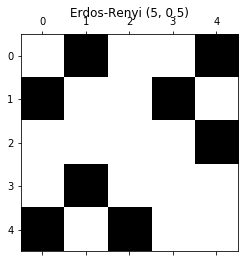

In [30]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.5)')

k:  4.0 L: 18.0


Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

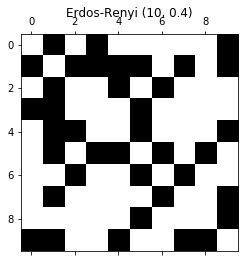

In [31]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [32]:
# calculate percentage of nodes from all possible nodes
L = (((n_nodes * (n_nodes - 1)) / 2))
p = ((L - (n_edges) * 100 )/ L)/100
er = erdos_renyi(n_nodes, p, )

k:  19.645055643879175 L: 30891.850000000002


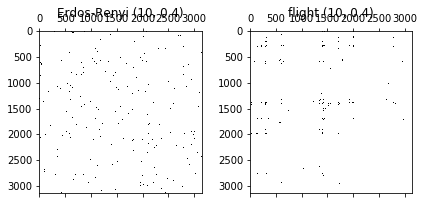

In [33]:
plt.subplot(1, 2, 1)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

plt.subplot(1, 2, 2)
plt.spy(adjacency)
plt.title('flight (10, 0.4)')
plt.tight_layout()

**Your answer here.**

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [45]:
def barabasi_albert(n, m, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    np.random.seed(seed)

    # create m*m matrix with m connections -> full
    adjacency = np.ones((m+1,m+1))
    
    # delete diagonal
    np.fill_diagonal(adjacency, 0)
    
    # loop till graph is n
    for i in range(m+2, n):

        # add node each iteration and resize array by one col and row
        b = np.zeros((i,i))
        b[:-1,:-1] = adjacency
        adjacency = b
                
        # sum of all degrees of current adj
        sum_deg = np.count_nonzero(adjacency)
        
        # calc pref attachment probabilities for each old node
        p = []
        for k in range(0, adjacency.shape[0]-1):
            x = np.count_nonzero(adjacency[k])/sum_deg
            p.append(x)
            
        # normalize so that the sum equals one for np.choice
        pp = np.array(p)
        pp /= pp.sum()

        # add m edges to the new node
        while np.count_nonzero(adjacency[i-1]) <= m:  
            # random choice of the preferential attachment
            new_edge_index = np.random.choice(len(pp), 1, p=pp)
            adjacency[int(new_edge_index)][i-1] = 1
            adjacency[i-1][int(new_edge_index)] = 1
            
    np.fill_diagonal(adjacency, 1)
    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

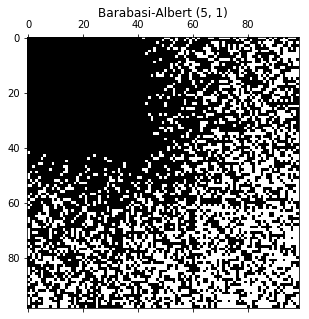

In [46]:
ba = barabasi_albert(100, 40, 9087)
plt.figure(figsize=(5,5))
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

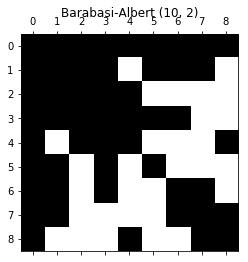

In [51]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

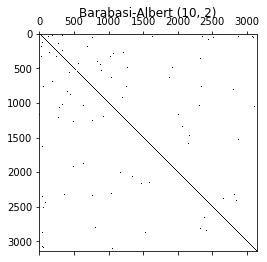

In [52]:
# takes ~1 min
ba = barabasi_albert(n_nodes, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

**Your answer here**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [ ]:
# Your code here.

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [ ]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    
    return kl

In [ ]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [ ]:
# Your code here.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

In [666]:
import networkx as nx

In [667]:
# function to plot adjacency matrix and draw network
def plot_Adjacency_w_Network(A, G, title="none"):
    f, axs = plt.subplots(1,2,figsize=(13,13))
    plt.subplot(221)
    plt.spy(A)
    
    plt.subplot(222)
    nx.draw(G, pos=nx.shell_layout(G), with_labels=True, font_weight='bold', node_color="yellow")
    plt.title(title)
    plt.show()

###  network properties to discuss on each model
- Degree distribution
- size & growth
- Network models, like random or scale-free networks

##### 1. Erdös-Rényi model
##### 2. Watts-Strogatz model
##### 3. The Barabási-Albert Model
###### 3_1. The Barabási-Albert Model - Growth-only model
###### 3_2. The Barabási-Albert Model - Preferential attachment-only model

## 1. Erdös-Rényi model

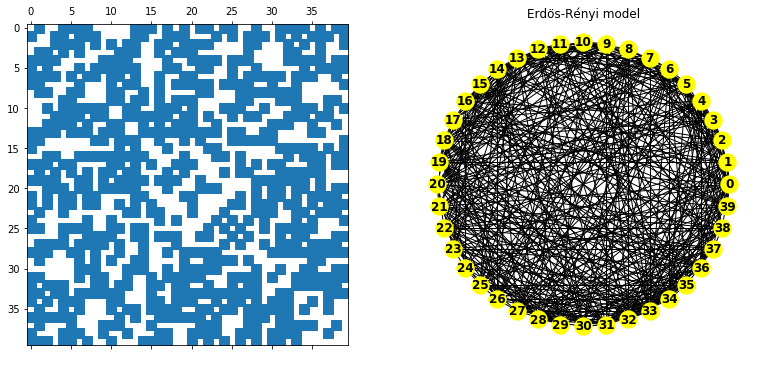

In [670]:
n = 40
p = 0.5
seed = 12
'''
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
'''
G = nx.gnp_random_graph(n, p, seed=12, directed=False)
A = nx.adj_matrix(G)
plot_Adjacency_w_Network(A,G,"Erdös-Rényi model")

#### Erdös-Rényi model does not fit good.
    
    a random network model is a network where each pair of nodes is connected with probability p
    random: YES 

#### Model fit

- bad representation of real world
- model does not generate local clusters
- in general ER graphs have a low clustering coefficient, which we have in our real model
- have a constant, random, and independent probability of two nodes being connected
- no hubs as in scale free networks
   - The existence of hubs is the biggest difference between random networks and scale-free networks.

## 2. Watts-Strogatz model

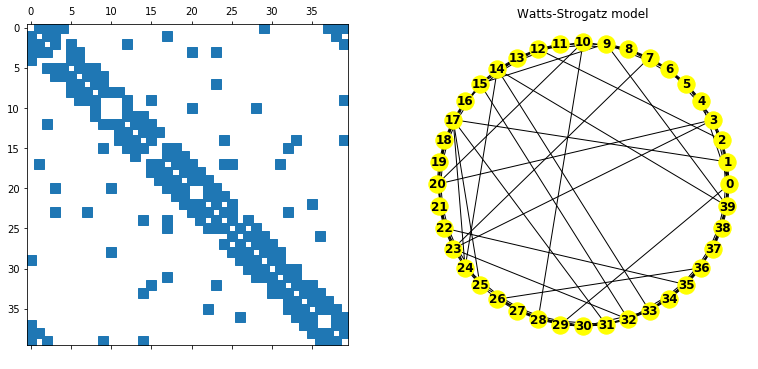

In [671]:
n = 40
k = 6
p = 0.2
'''
    n : int
        The number of nodes
    k : int
        Each node is connected to k nearest neighbors in ring topology
    p : float
        The probability of rewiring each edge (0 = only neighbours, 1 = all nodes)
'''
G = nx.watts_strogatz_graph(n, k, p, seed)
A = nx.adj_matrix(G)
plot_Adjacency_w_Network(A,G,"Watts-Strogatz model")

#### Watts-Strogatz model fits better than the first one. 

    Extension of the random network model for 
        1. small world property
        2. high clustering
    random: YES


#### Model Fit:
We can interpret it as follows: Each airport node is connected to k other neighbouring airports. k represents the average degree of each airpot node.

Furthermore the probability p (between 0 and 1) describes the rewiring probability that allows each node to connect to any other airport node of the whole network exept itself. This is basically how clusters evolve in the undirected graph using this model.

If p is zero the airport is connected to its closest k airport nodes.
If p is one each connection gets rewired/redirected.

- (+) in a real world model redirections probably happen but not so often as in this model.
- (+) the idea of the closest neighbours is pretty similar and logic to the airport-flight network
- (-) there is no network growth

## 3. Barabási-Albert model

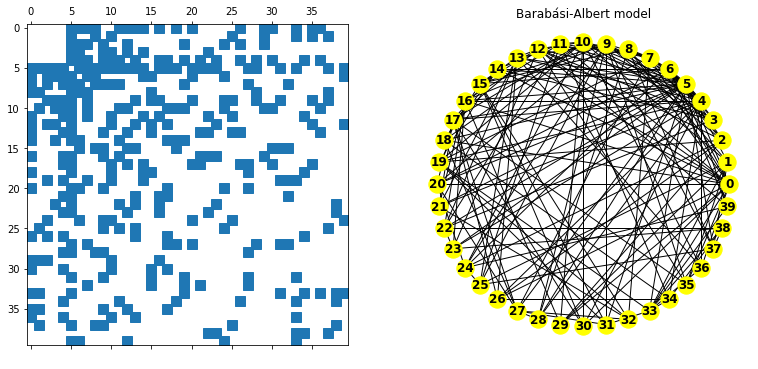

In [672]:
n = 40
m = 5
'''
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
'''
G = nx.barabasi_albert_graph(n, m, seed)
A = nx.adj_matrix(G)
plot_Adjacency_w_Network(A,G,"Barabási-Albert model")

#### The Barabási-Albert Model fits better than the first two models.
    
    Growth and preferential attachment cannot be captured by random networks
        1. growth only model
        2. preferential attachment only model
    random: NO -> scale free
    
The The Barabási-Albert Model starts off by creating a m times m matrix in which each node is connected to each other. After the initial generation of the mxm matrix, for each iteration, a new node with m edges/connections gets added to the network, until the desired network size of n gets reached.

To decide to which node a new node connects this model uses preferential attachment probability, which is based on the each degree of the currently existing nodes of the network. Therefore the new node tends to connect to nodes with higher degree as their preferential attachment probability is higher.

#### Model Fit:
- (+) growth & size: a new airport gets added and creates not necessarily m nodes but at least one
- (+) preferential attachment: similar to our real network as big airports are more "attractive"  probably for 
economic reasons
- (-) scale-free and therefore not a random model

## 3.1. Barabási-Albert Model - Growth-only model

In [676]:
# no preferential process!
def barabasi_albert_growth_only(n, m, seed=None):

    np.random.seed(seed)

    # create m*m matrix with m connections -> full
    adjacency = np.ones((m+1,m+1))
    
    # delete diagonal
    np.fill_diagonal(adjacency, 0)
    
    # loop till graph is n
    for i in range(m+2, n):

        # add node each iteration and resize array by one col and row
        b = np.zeros((i,i))
        b[:-1,:-1] = adjacency
        adjacency = b
                
        # sum of all degrees of current adj
        sum_deg = np.count_nonzero(adjacency)

        # equal pref attachment probabilities for each old node
        p = [1/adjacency.shape[0]-1] * (adjacency.shape[0]-1)
        
        # normalize so that the sum equals one for np.choice
        pp = np.array(p)
        pp /= pp.sum()

        # add m edges to the new node
        while np.count_nonzero(adjacency[i-1]) <= m:  
            # random choice of the preferential attachment
            new_edge_index = np.random.choice(len(pp), 1, p=pp)
            adjacency[int(new_edge_index)][i-1] = 1
            adjacency[i-1][int(new_edge_index)] = 1
            
    np.fill_diagonal(adjacency, 1)
    return adjacency


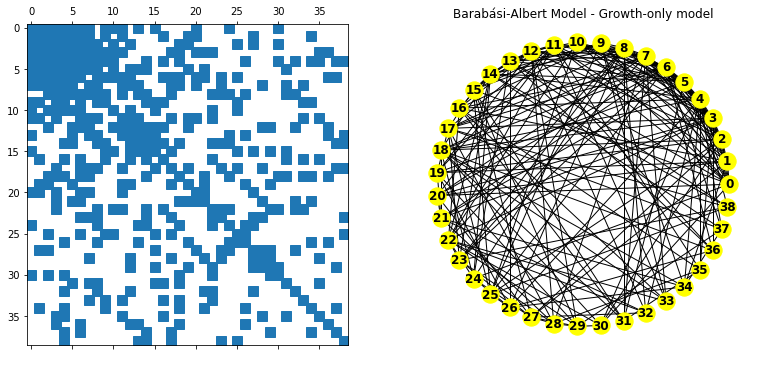

In [677]:
n = 40
m = 5

ba_go = barabasi_albert_growth_only(n, m, seed)
G = nx.from_numpy_matrix(ba_go)
A = nx.adj_matrix(G)
plot_Adjacency_w_Network(A,G,"Barabási-Albert Model - Growth-only model")

#### Barabási-Albert Model - Growth-only model


#### Model Fit:
- (+) growth & size: a new airport gets added and creates not necessarily m nodes but at least one
- (+/-) preferential attachment: no preferential attachment but therefore a random network
- (+) random

I would consider this so far to be the best fit model compared to the airport-flight-network

## 3.2. The Barabási-Albert Model - Preferential attachment-only model

In [678]:
# no growth process!
def barabasi_albert_preferential_attachment_only(n, m, seed=None):

    np.random.seed(seed)

    # create m*m matrix with m connections -> full
    adjacency = np.zeros((n,n))
    np.fill_diagonal(adjacency, 1)

    
    # add edges n times
    for i in range(n):
        
        # sum of all degrees of current adj
        sum_deg = np.count_nonzero(adjacency)

        # calc pref attachment probabilities for each old node
        p = []
        for k in range(0, adjacency.shape[0]-1):
            x = np.count_nonzero(adjacency[k])/sum_deg
            p.append(x)
            
        # normalize so that the sum equals one for np.choice
        pp = np.array(p)
        pp /= pp.sum()

        # add m edges to the new node
        while np.count_nonzero(adjacency[i-1]) <= m:  
            # random choice of the preferential attachment
            new_edge_index = np.random.choice(len(pp), 1, p=pp)
            adjacency[int(new_edge_index)][i-1] = 1
            adjacency[i-1][int(new_edge_index)] = 1
           
    return adjacency


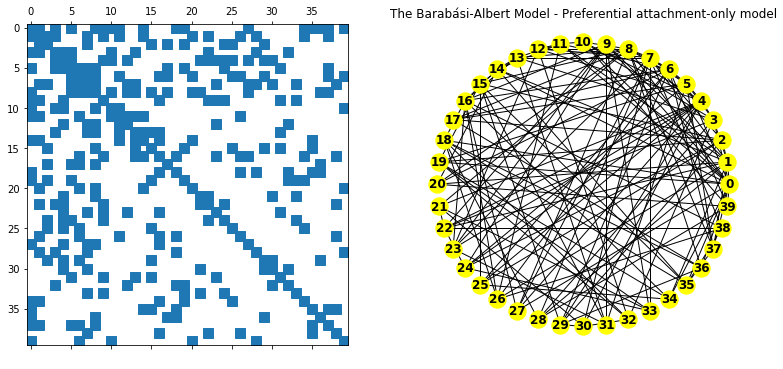

In [679]:
n = 40
m = 5

ba_go = barabasi_albert_preferential_attachment_only(n, m, seed)
G = nx.from_numpy_matrix(ba_go)
A = nx.adj_matrix(G)
plot_Adjacency_w_Network(A,G,"The Barabási-Albert Model - Preferential attachment-only model")

#### Barabási-Albert Model - Preferential attachment-only model


#### Model Fit:
- (+/-) fixed growth and therefore fixed size, taking away this aspect from the OG model makes it a random network
- (+) preferential attachment: no preferential attachment but therefore a random network
- (+) random

I would consider this so far to be the best fit model compared to the airport-flight-network

### Model ranking according to best fit (so far ..)
1. Barabási-Albert (not random)
2. making Barabási-Albert random
    - The Barabási-Albert Model - Growth-only model
    - The Barabási-Albert Model - Preferential attachment-only model
3. Watts-Strogatz
4. Erdös-Rényi

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**